## Visualizing results

This is the main script for creating the plots of the paper

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Figure 2

models = ["vit", "dinov2", "clip", "mae"]
num_concepts = []
all_concepts = []
plt.figure(figsize=(7, 5))
for model in models: 
    df = pd.read_csv(f"results/{model}.csv")
    num_concepts = []
    for layer_name in df.layer.unique():
        layer = df[df["layer"]==layer_name]
        labels =  layer[layer["similarity"] > layer["similarity"].median()]
        num_concepts.append(len(labels["description"].unique()))
        all_concepts.append(labels["description"].unique())
        

    plt.plot(num_concepts, label=model)
plt.title("Number of different concepts per layer")
plt.xlabel("Layer")
plt.ylabel("Number of concepts")
plt.legend(["sup-ViT", "DINOv2", "CLIP", "MAE"])
plt.show()

all_concepts = np.concatenate(all_concepts)
all_concepts = np.unique(all_concepts)
len(all_concepts)


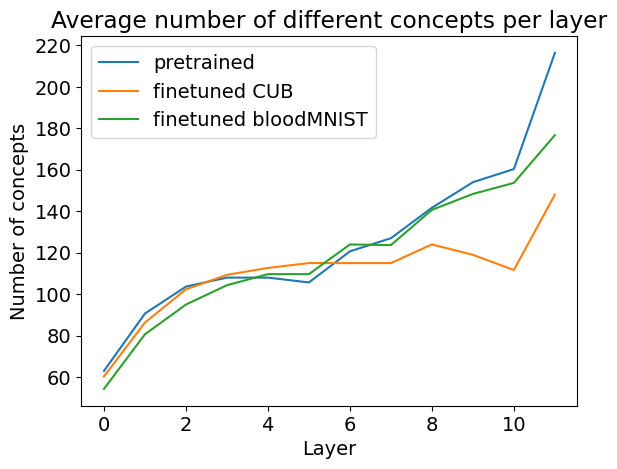

In [ ]:
# Figure 8

num_concepts_original = []
num_concepts_cub = []
num_concepts_bloodmnist = []

models = ["vit", "dinov2", "clip"]
finetuned_models = ["vit_cub", "dinov2_cub", "clip_cub", "vit_bloodmnist", "dinov2_bloodmnist", "clip_bloodmnist"]

# Calculate average number of concepts for original models
for model in models: 
    df = pd.read_csv(f"results/{model}.csv")
    num_concepts_model = []
    for layer_name in df.layer.unique():
        layer = df[df["layer"] == layer_name]
        labels = layer[layer["similarity"] > layer["similarity"].median()]
        num_concepts_model.append(len(labels["description"].unique()))
        #all_concepts.append(labels["description"].unique())
    num_concepts_original.append(num_concepts_model)

avg_num_concepts_original = np.mean(num_concepts_original, axis=0)
plt.plot(avg_num_concepts_original, label="pretrained")

# Calculate average number of concepts for finetuned models on cub
for model in finetuned_models[:3]:
    df = pd.read_csv(f"results/{model}.csv")
    num_concepts_model = []
    for layer_name in df.layer.unique():
        layer = df[df["layer"] == layer_name]
        labels = layer[layer["similarity"] > layer["similarity"].median()]
        num_concepts_model.append(len(labels["description"].unique()))
        #all_concepts.append(labels["description"].unique())
    num_concepts_cub.append(num_concepts_model)

avg_num_concepts_cub = np.mean(num_concepts_cub, axis=0)
plt.plot(avg_num_concepts_cub, label="finetuned CUB")

# Calculate average number of concepts for finetuned models on bloodmnist
for model in finetuned_models[3:]:
    df = pd.read_csv(f"results/{model}.csv")
    num_concepts_model = []
    for layer_name in df.layer.unique():
        layer = df[df["layer"] == layer_name]
        labels = layer[layer["similarity"] > layer["similarity"].median()]
        num_concepts_model.append(len(labels["description"].unique()))
        #all_concepts.append(labels["description"].unique())
    num_concepts_bloodmnist.append(num_concepts_model)

avg_num_concepts_bloodmnist = np.mean(num_concepts_bloodmnist, axis=0)
plt.plot(avg_num_concepts_bloodmnist, label="finetuned bloodMNIST")

plt.title("Average number of different concepts per layer")
plt.xlabel("Layer")
plt.ylabel("Number of concepts")
plt.legend()
plt.show()

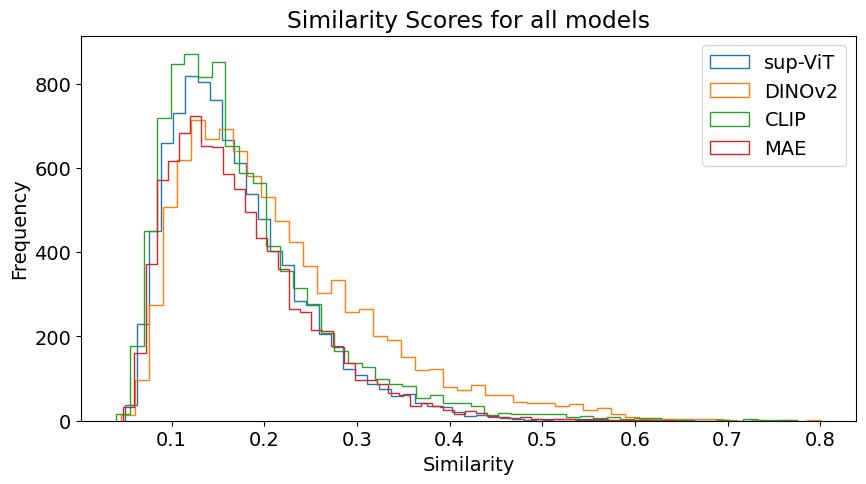

In [ ]:
#plot similarity scores as histogram for all models

plt.figure(figsize=(10, 5))

for model in models:
    df = pd.read_csv(f"results/{model}.csv")
    plt.hist(df['similarity'], bins=50, label=model, histtype='step')
        
plt.title(f'Similarity Scores for all models')
plt.xlabel('Similarity')
plt.ylabel('Frequency')
plt.legend(["sup-ViT", "DINOv2", "CLIP", "MAE"])


# Plots for categories

In [16]:
curated_dataset.keys()

dict_keys(['colors', 'textures and materials', 'machines', 'architectural structures', 'natural elements and organisms', 'objects', 'places', 'activities', 'unknown', 'names', 'abstract'])

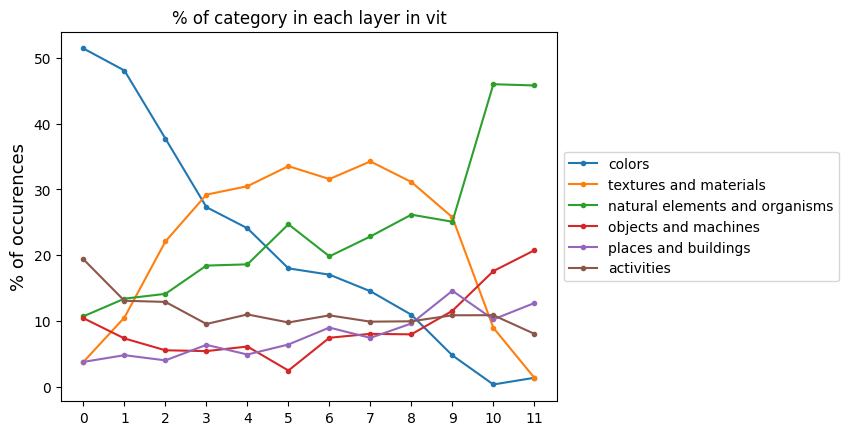

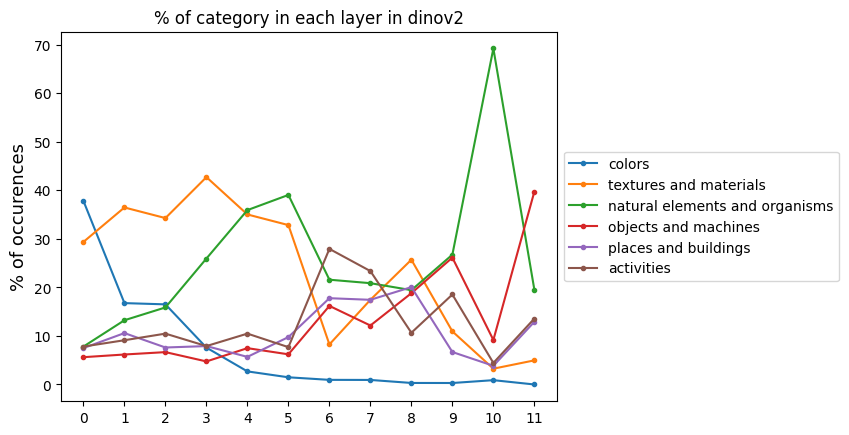

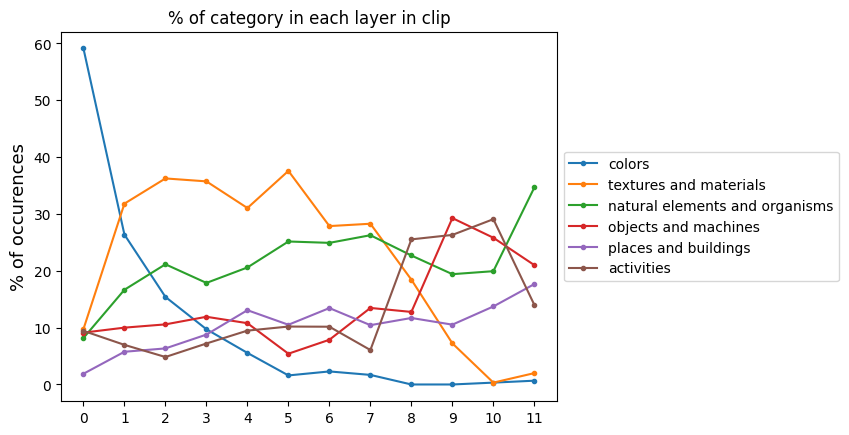

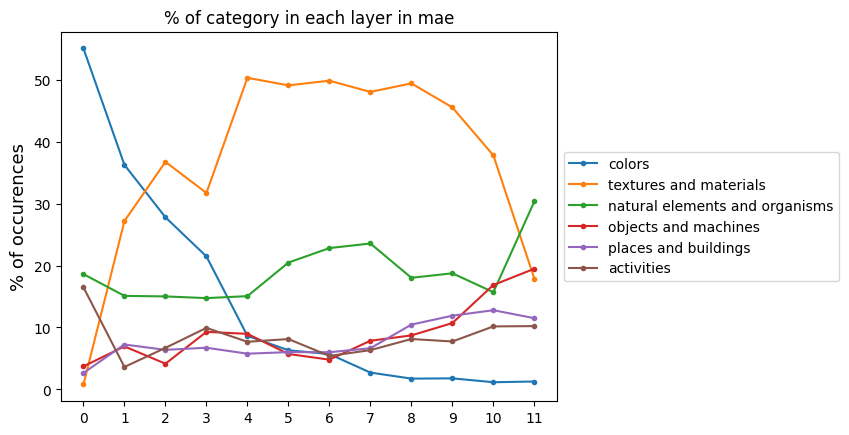

In [1]:
# plot categories

import json
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


with open("data/words_per_category_curated.json", "r") as f:
    curated_dataset = json.load(f)

for model in ["vit", "dinov2", "clip", "mae"]:
    results = pd.read_csv(f"results/{model}.csv")
    histograms_all = {}
    for key, value in curated_dataset.items():
        if key in ['unknown', 'names', 'abstract']:
            continue
        histogram = []
        for layer in results.layer.unique():

            layer_results = results[results["layer"] == layer]
            layer_filtered = layer_results[layer_results["similarity"] > layer_results["similarity"].mean()]
            words_in_layer = [word for word in layer_filtered["description"] if word in value]
            histogram.append(len(words_in_layer) / len(layer_filtered["description"]) * 100)
        histograms_all[key] = histogram


    for i, (key, hist) in enumerate(histograms_all.items()):
        plt.plot(hist, '.-', label=key)
    # plt.plot([len(words_per_layer[layer]) for layer in layers], '.-', label="Words above threshold", color="#ffed6f")
    plt.xticks(ticks=range(len(results.layer.unique())), labels=range(len(results.layer.unique())))
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title(f"% of category in each layer in {model}")
    plt.ylabel(f"% of occurences", fontsize=13)
    #plt.savefig(f"results/plots/{model}_categories.png",
    #         bbox_inches='tight')
    plt.show()
        


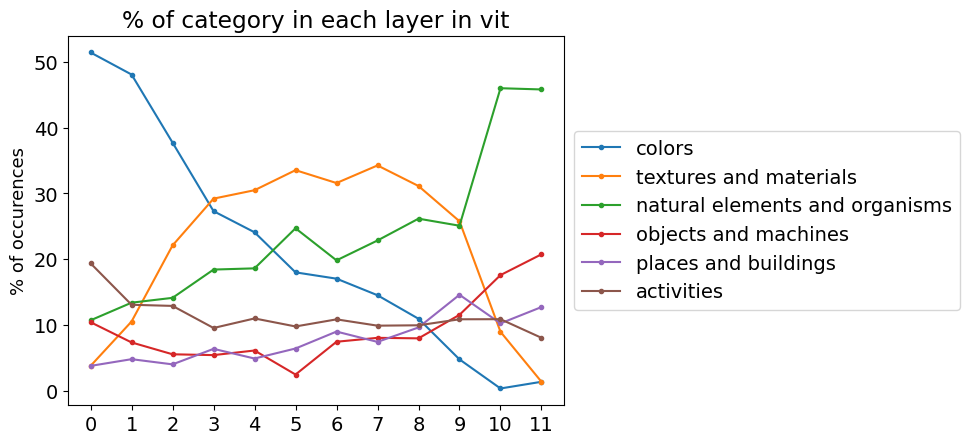

In [ ]:
# plot categories for individual models

import json
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


with open("data/words_per_category_curated.json", "r") as f:
    curated_dataset = json.load(f)

for model in ["vit"]:
    results = pd.read_csv(f"results/{model}.csv")
    histograms_all = {}
    for key, value in curated_dataset.items():
        if key in ['unknown', 'names', 'abstract']:
            continue
        histogram = []
        for layer in results.layer.unique():

            layer_results = results[results["layer"] == layer]
            layer_filtered = layer_results[layer_results["similarity"] > layer_results["similarity"].mean()]
            words_in_layer = [word for word in layer_filtered["description"] if word in value]
            histogram.append(len(words_in_layer) / len(layer_filtered["description"]) * 100)
        histograms_all[key] = histogram


    for i, (key, hist) in enumerate(histograms_all.items()):
        plt.plot(hist, '.-', label=key)
    # plt.plot([len(words_per_layer[layer]) for layer in layers], '.-', label="Words above threshold", color="#ffed6f")
    plt.xticks(ticks=range(len(results.layer.unique())), labels=range(len(results.layer.unique())))
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title(f"% of category in each layer in {model}")
    plt.ylabel(f"% of occurences", fontsize=13)
    #plt.savefig(f"results/plots/{model}_categories.png",
    #         bbox_inches='tight')
    plt.show()
        


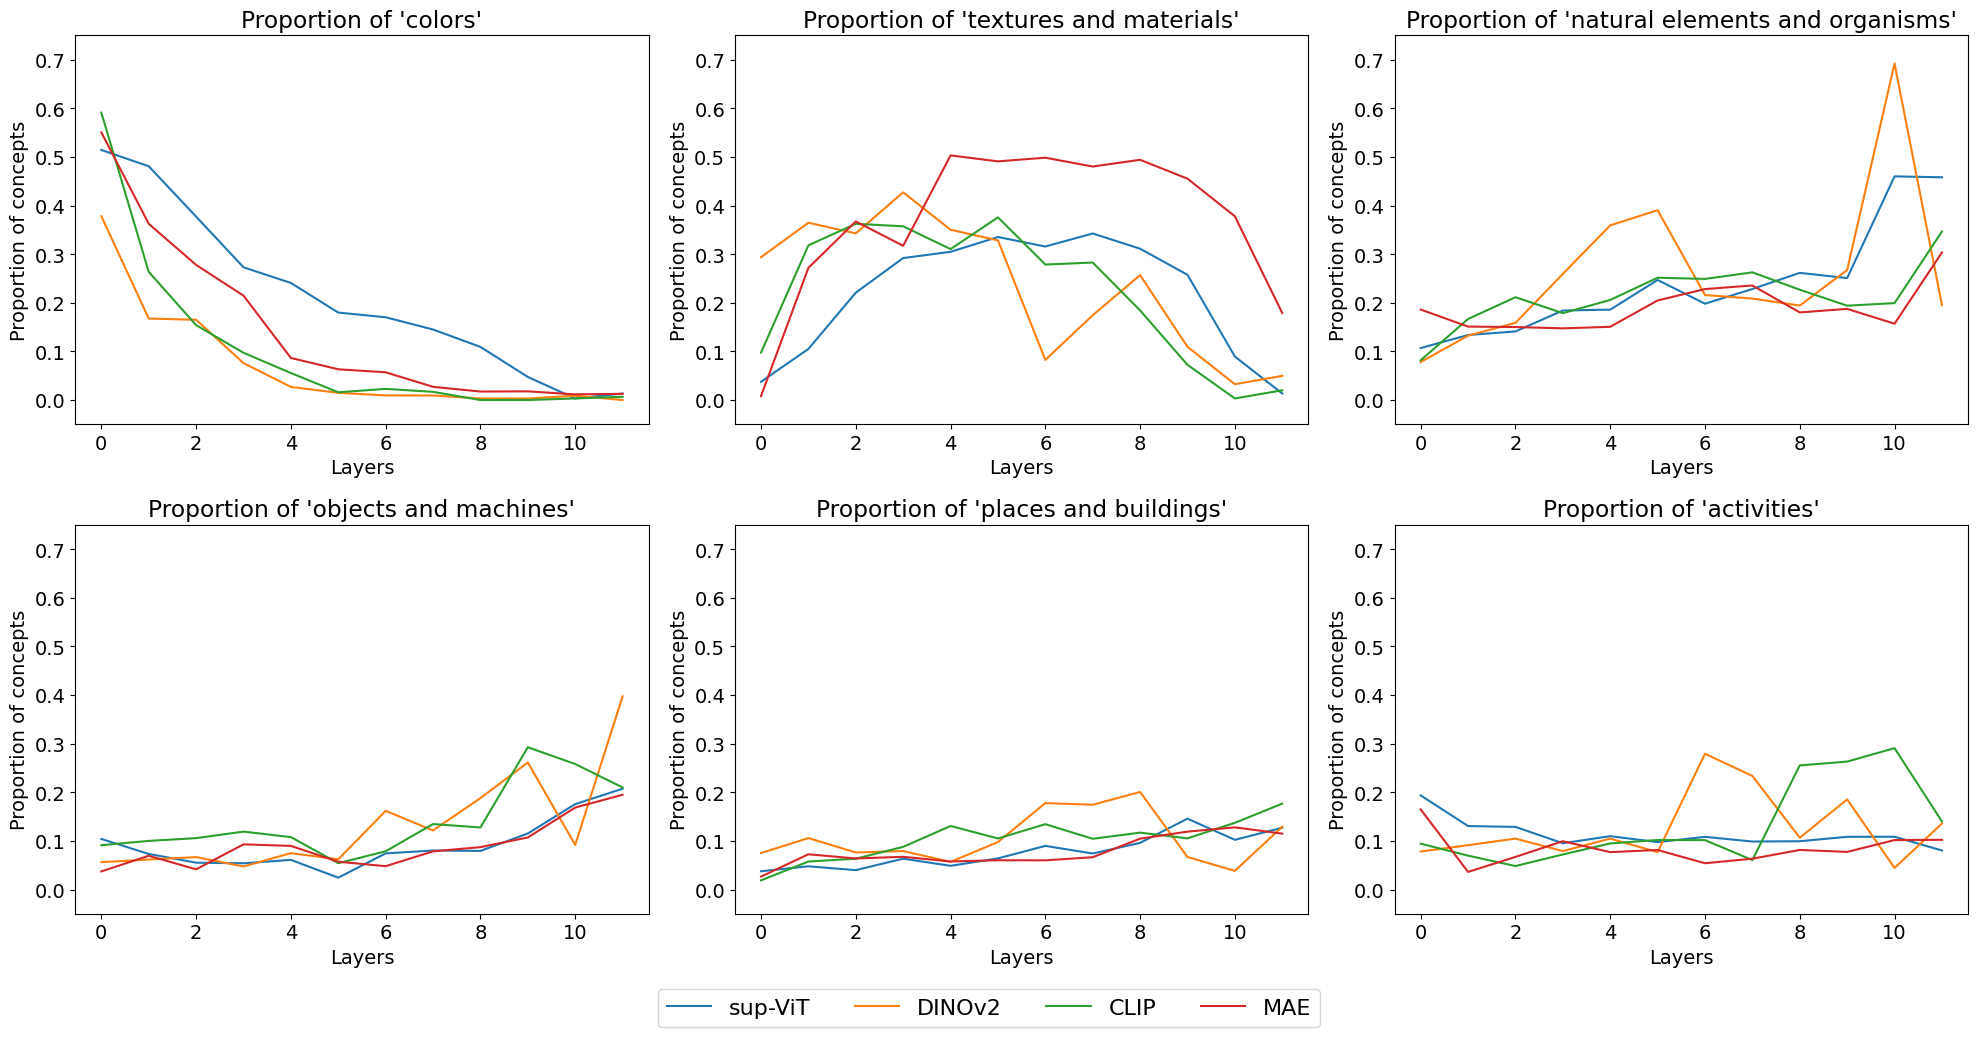

In [ ]:
#Figure 3

import json
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
axes = axes.flatten()
categories = ['colors', 'textures and materials', 'natural elements and organisms', 'objects and machines', 'places and buildings', 'activities' ]

for ax, category in zip(axes, categories):
    for model in ["vit", "dinov2", "clip", "mae"]:
        results = pd.read_csv(f"results/{model}.csv")
        histogram = []
        for layer in results.layer.unique():
            layer_results = results[results["layer"] == layer]
            layer_filtered = layer_results[layer_results["similarity"] > layer_results["similarity"].mean()]
            words_in_layer = [word for word in layer_filtered["description"] if word in curated_dataset[category]]
            histogram.append(len(words_in_layer) / len(layer_filtered["description"]))
        ax.plot(histogram, label=model)
    ax.set_title(f"Proportion of '{category}'")
    ax.set_ylim(-0.05, 0.75)
    ax.set_xlabel("Layers")
    ax.set_ylabel("Proportion of concepts")
    #ax.legend()
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, ["sup-ViT", "DINOv2", "CLIP", "MAE"], loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=4, fontsize=16)
plt.tight_layout()
plt.show()

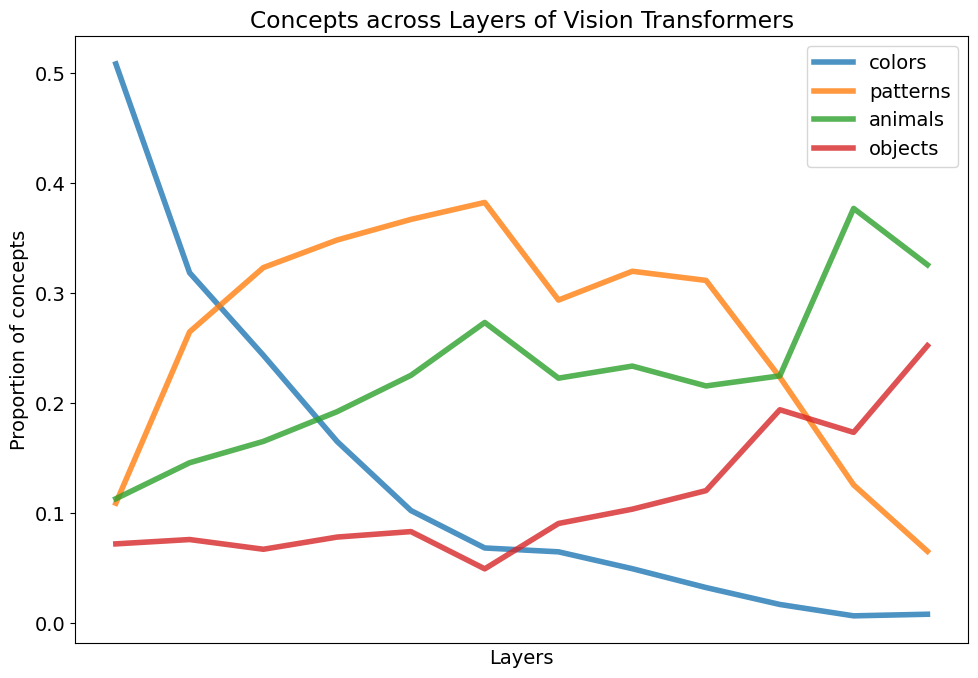

In [ ]:
# Figure 1
import json
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


with open("data/words_per_category_curated.json", "r") as f:
    curated_dataset = json.load(f)
plt.rcParams.update({'font.size': 14})
mean_proportions = {}
std = {}


for key, value in curated_dataset.items():
    if key in ['unknown', 'names', 'abstract', 'places and buildings', 'activities']: 
        continue

    histogram = []
    for model in ["vit", "dinov2", "clip", "mae"]:
        results = pd.read_csv(f"results/{model}.csv")
        
        for layer in results.layer.unique():
            layer_results = results[results["layer"] == layer]
            layer_filtered = layer_results[layer_results["similarity"] > layer_results["similarity"].mean()]
            words_in_layer = [word for word in layer_filtered["description"] if word in value]
            histogram.append(len(words_in_layer) / len(layer_filtered["description"]))
    
    #print(np.array(histogram).reshape(4, -1))
    mean_hist = np.mean(np.array(histogram).reshape(4, -1), axis=0)
    std_hist = np.std(np.array(histogram).reshape(4, -1), axis=0)
    mean_proportions[key] = mean_hist
    std[key] = std_hist

plt.figure(figsize=(10,7))
for (key, mean_hist), name in zip(mean_proportions.items(), ['colors', 'patterns', 'animals', 'objects']):
    plt.plot(mean_hist, '-', label=name, alpha=0.8, linewidth=4)
    #plt.fill_between(range(len(mean_hist)), mean_hist - std[key], mean_hist + std[key], alpha=0.2)

plt.xticks([])
#plt.yticks([])
plt.title("Concepts across Layers of Vision Transformers") 
plt.xlabel("Layers")
plt.ylabel("Proportion of concepts")
plt.legend() #loc='center left', bbox_to_anchor=(1, 0.5), )
plt.tight_layout()
plt.show()

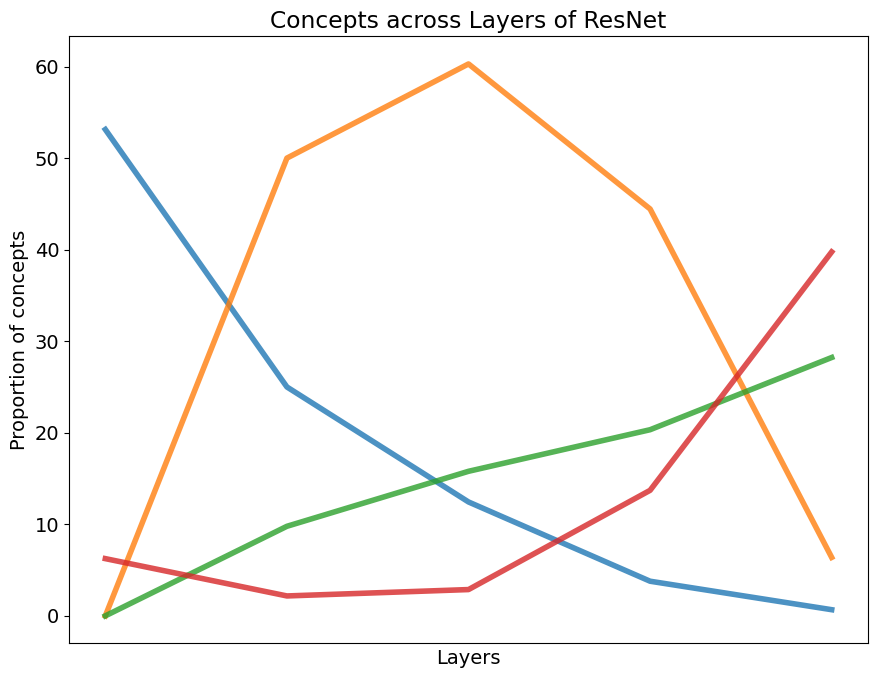

In [ ]:
# Figure 6
import json
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


with open("data/words_per_category_curated.json", "r") as f:
    curated_dataset = json.load(f)
plt.rcParams.update({'font.size': 14})
mean_proportions = {}
std = {}


for key, value in curated_dataset.items():
    if key in ['unknown', 'names', 'abstract', 'places and buildings', 'activities']: 
        continue

    histogram = []
    for model in ["resnet"]:
        results = pd.read_csv(f"results/{model}.csv")
        
        for layer in results.layer.unique():
            layer_results = results[results["layer"] == layer]
            layer_filtered = layer_results[layer_results["similarity"] > layer_results["similarity"].mean()]
            words_in_layer = [word for word in layer_filtered["description"] if word in value]
            histogram.append(len(words_in_layer) / len(layer_filtered["description"]) * 100)
    
    #print(np.array(histogram).reshape(4, -1))
    mean_hist = histogram
    #std_hist = np.std(np.array(histogram).reshape(4, -1), axis=0)
    mean_proportions[key] = mean_hist
    #std[key] = std_hist

plt.figure(figsize=(9,7))
for (key, mean_hist), name in zip(mean_proportions.items(), ['colors', 'patterns', 'animals', 'objects']):
    plt.plot(mean_hist, '-', label=key,  alpha=0.8, linewidth=4)
    #plt.fill_between(range(len(mean_hist)), mean_hist - std[key], mean_hist + std[key], alpha=0.2)

plt.xticks([])
#plt.yticks([])
plt.title("Concepts across Layers of ResNet") 
plt.xlabel("Layers")
plt.ylabel("Proportion of concepts")
#plt.legend()
plt.tight_layout()
plt.show()

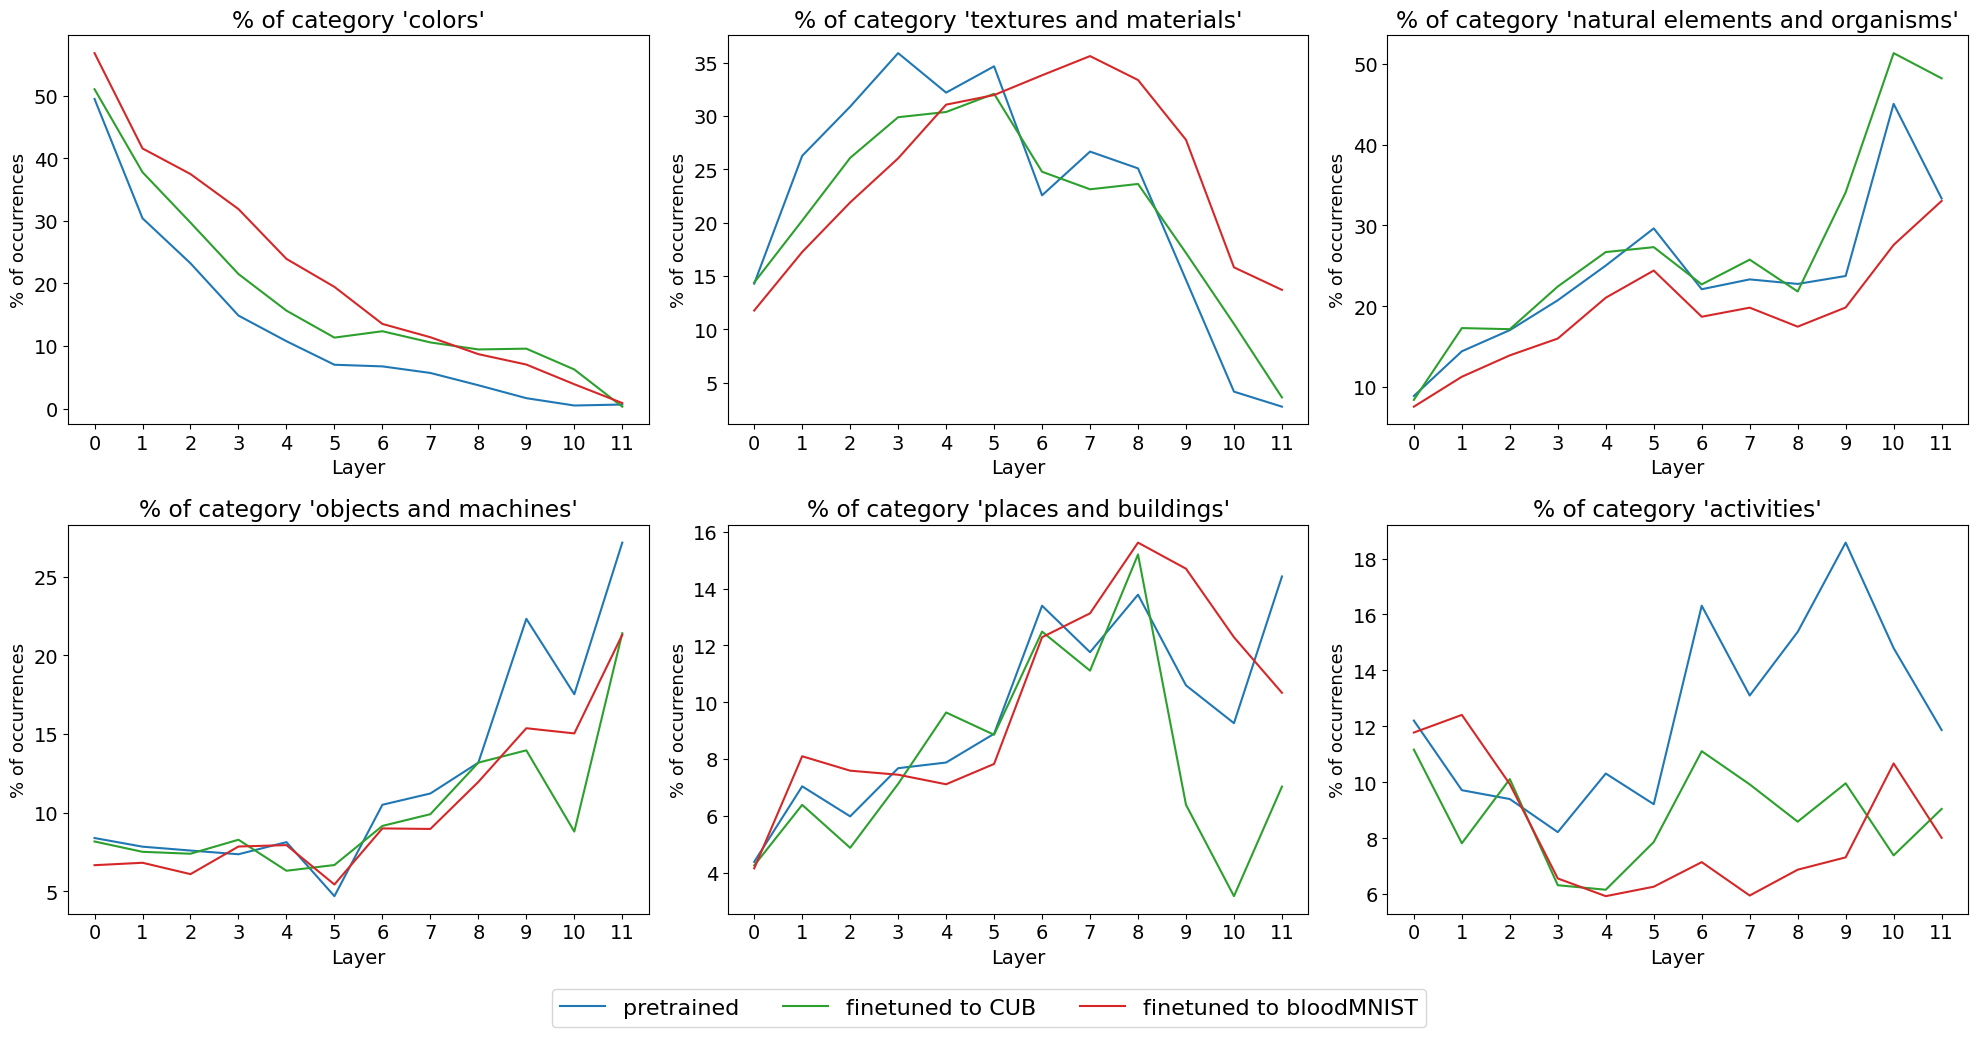

In [ ]:
# Figure 7

mean_histograms = {"original": {}, "cub": {}, "bloodmnist": {}}
for key, value in curated_dataset.items():
    if key in ['unknown', 'names', 'abstract']: 
        continue

    histograms = {"original": [], "cub": [], "bloodmnist": []}
    for model in ["vit", "dinov2", "clip"]:
        results = pd.read_csv(f"results/{model}.csv")
        histogram = []
        for layer in results.layer.unique():
            layer_results = results[results["layer"] == layer]
            layer_filtered = layer_results[layer_results["similarity"] > layer_results["similarity"].mean()]
            words_in_layer = [word for word in layer_filtered["description"] if word in value]
            histogram.append(len(words_in_layer) / len(layer_filtered["description"]) * 100)
        histograms["original"].append(histogram)

    for model in ["vit_cub", "dinov2_cub", "clip_cub"]:
        results = pd.read_csv(f"results/{model}.csv")
        histogram = []
        for layer in results.layer.unique():
            layer_results = results[results["layer"] == layer]
            layer_filtered = layer_results[layer_results["similarity"] > layer_results["similarity"].mean()]
            words_in_layer = [word for word in layer_filtered["description"] if word in value]
            histogram.append(len(words_in_layer) / len(layer_filtered["description"]) * 100)
        histograms["cub"].append(histogram)

    for model in ["vit_bloodmnist", "dinov2_bloodmnist", "clip_bloodmnist"]:
        results = pd.read_csv(f"results/{model}.csv")
        histogram = []
        for layer in results.layer.unique():
            layer_results = results[results["layer"] == layer]
            layer_filtered = layer_results[layer_results["similarity"] > layer_results["similarity"].mean()]
            words_in_layer = [word for word in layer_filtered["description"] if word in value]
            histogram.append(len(words_in_layer) / len(layer_filtered["description"]) * 100)
        histograms["bloodmnist"].append(histogram)

    mean_histograms["original"][key] = np.mean(histograms["original"], axis=0)
    mean_histograms["cub"][key] = np.mean(histograms["cub"], axis=0)
    mean_histograms["bloodmnist"][key] = np.mean(histograms["bloodmnist"], axis=0)

plt.rcParams.update({'font.size': 14})

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
axes = axes.flatten()
idx = 0
for key in mean_histograms["original"].keys():
    ax = axes[idx]
    idx += 1
    ax.plot(mean_histograms["original"][key], 'C0-', label='pretrained')
    ax.plot(mean_histograms["cub"][key], 'C2-', label='finetuned to CUB')
    ax.plot(mean_histograms["bloodmnist"][key], 'C3-', label='finetuned to bloodMNIST')
    
    ax.set_xticks(range(12))
    ax.set_xticklabels(range(12))
    ax.set_title(f"% of category '{key}'")
    ax.set_ylabel(f"% of occurrences", fontsize=13)
    ax.set_xlabel("Layer")

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=3, fontsize=16)
plt.tight_layout()
plt.show()


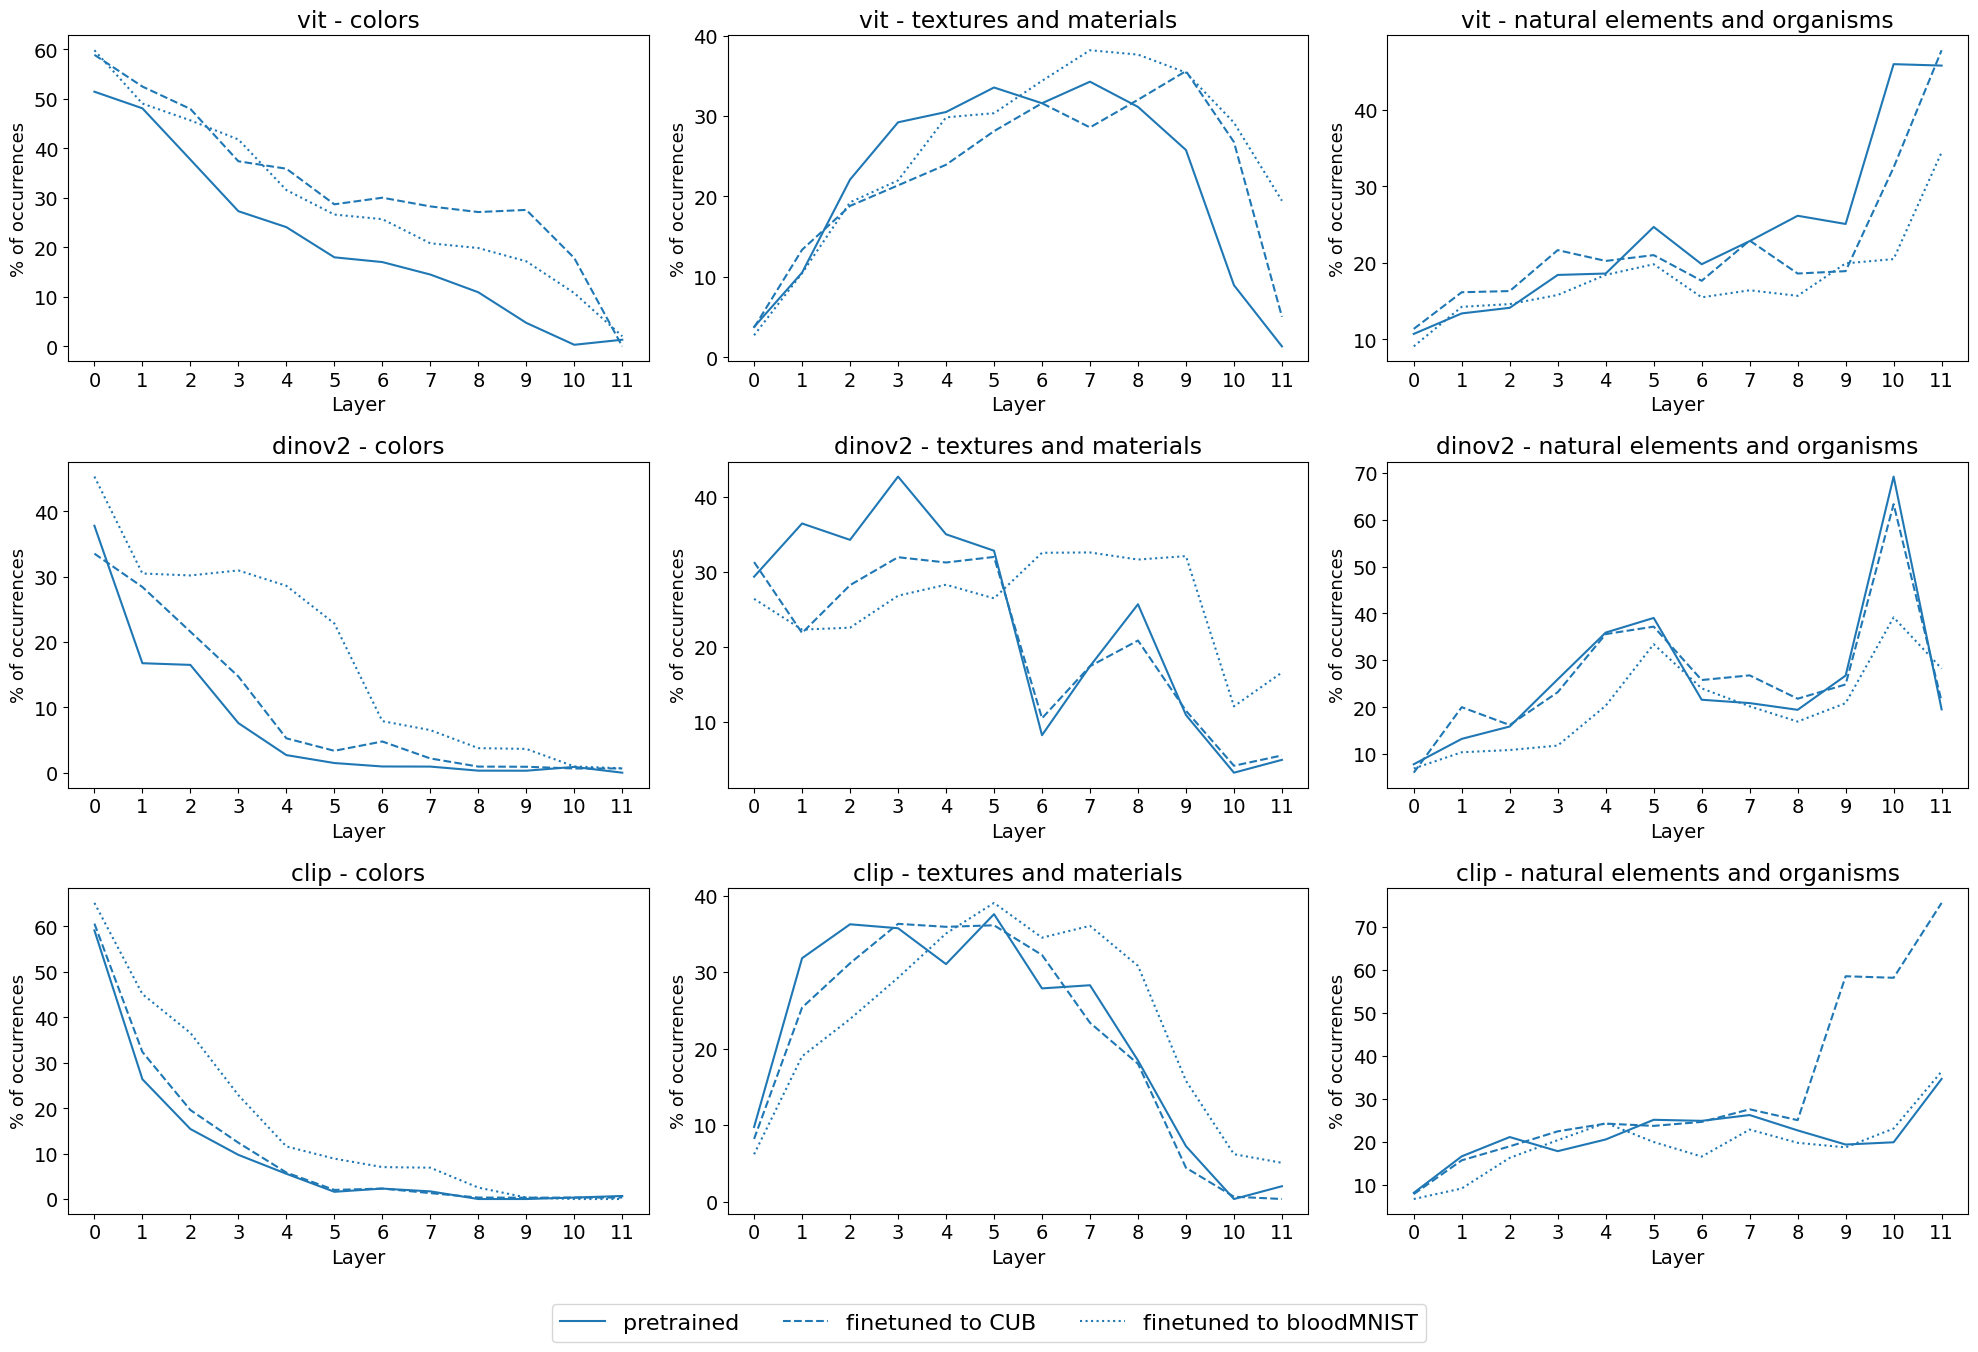

In [ ]:
#appendix

import matplotlib.pyplot as plt
import json
import pandas as pd

with open("data/words_per_category_curated.json", "r") as f:
    curated_dataset = json.load(f)
categories = ['colors', 'textures and materials', 'natural elements and organisms']
models = ["vit", "dinov2", "clip"]
finetuned_models = ["vit_cub", "dinov2_cub", "clip_cub", "vit_bloodmnist", "dinov2_bloodmnist", "clip_bloodmnist"]
colors = ["C0-", "C0--", "C0:"]

plt.rcParams.update({'font.size': 14})
fig, axes = plt.subplots(len(models), len(categories), figsize=(20, 13))
axes = axes.flatten()

for i, model in enumerate(models):
    for j, category in enumerate(categories):
        ax = axes[i * len(categories) + j]
        value = curated_dataset[category]
        for finetuned_model, color in zip([model] + finetuned_models[i::3], colors):
            results = pd.read_csv(f"results/{finetuned_model}.csv")
            histogram = []
            for layer in results.layer.unique():
                layer_results = results[results["layer"] == layer]
                layer_filtered = layer_results[layer_results["similarity"] > layer_results["similarity"].mean()]
                words_in_layer = [word for word in layer_filtered["description"] if word in value]
                histogram.append(len(words_in_layer) / len(layer_filtered["description"]) * 100)
            ax.plot(histogram, color, label=finetuned_model)
        
        ax.set_xticks(range(12))
        ax.set_xticklabels(range(12))
        ax.set_title(f"{model} - {category}")
        ax.set_ylabel(f"% of occurrences", fontsize=13)
        ax.set_xlabel("Layer")
    

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, ['pretrained', 'finetuned to CUB', 'finetuned to bloodMNIST'], loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=3, fontsize=16)
plt.tight_layout()
plt.show()

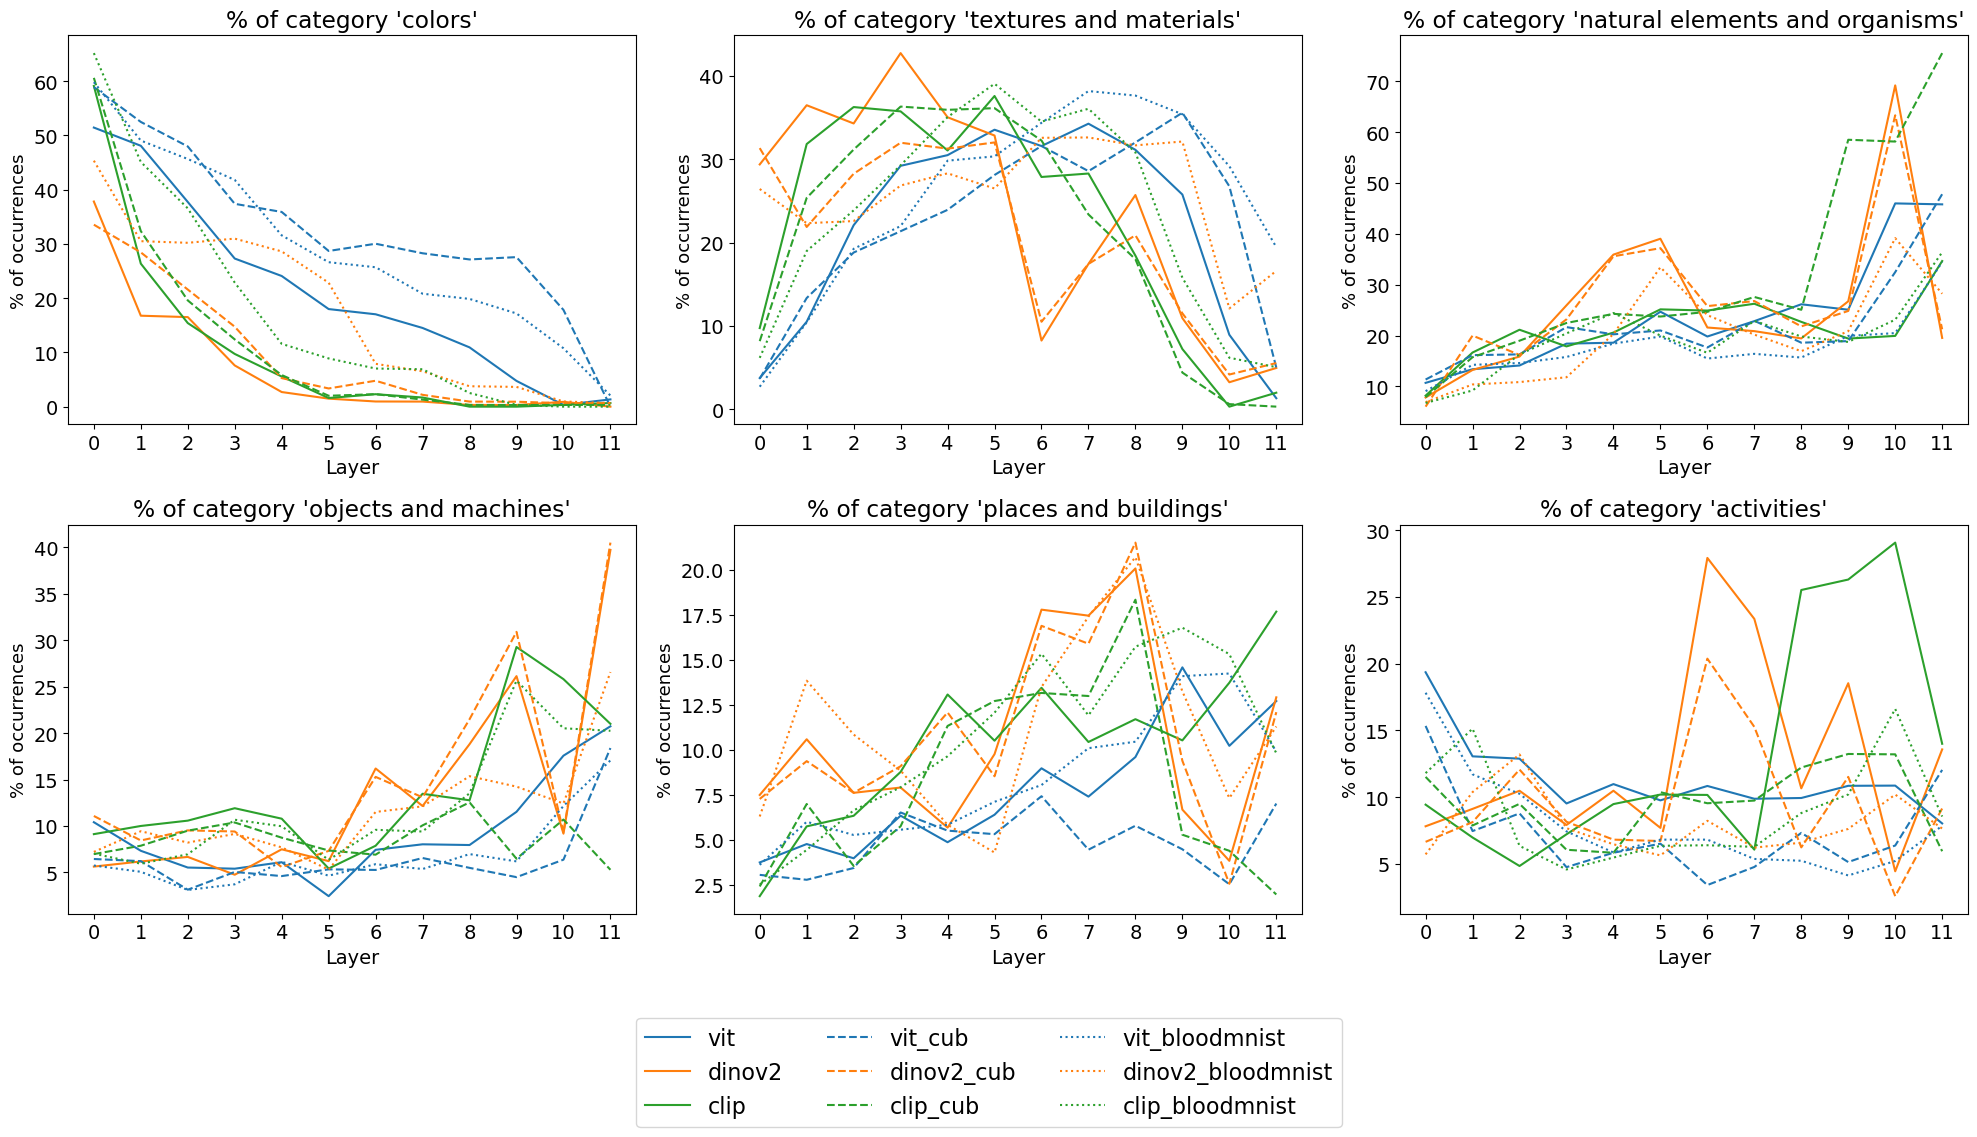

In [ ]:
# plot change during finetuning per category

plt.rcParams.update({'font.size': 14})

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
axes = axes.flatten()
colors = ["C0-", "C1-", "C2-", "C0--", "C1--", "C2--", "C0:", "C1:", "C2:"]
idx=0
for key, value in curated_dataset.items():
    if key in ['unknown', 'names', 'abstract', 'places and buildings', 'activities', 'objects and machines']: 
        continue

    ax = axes[idx]
    
    idx += 1
    for model, color in zip(["vit", "dinov2", "clip", "vit_cub", "dinov2_cub", "clip_cub", "vit_bloodmnist", "dinov2_bloodmnist","clip_bloodmnist"], colors):
        results = pd.read_csv(f"results/{model}.csv")
        histogram = []
        for layer in results.layer.unique():
            layer_results = results[results["layer"] == layer]
            layer_filtered = layer_results[layer_results["similarity"] > layer_results["similarity"].mean()]
            words_in_layer = [word for word in layer_filtered["description"] if word in value]
            histogram.append(len(words_in_layer) / len(layer_filtered["description"]) * 100)
        ax.plot(histogram, color, label=model)
    
    ax.set_xticks(range(12))
    ax.set_xticklabels(range(12))
    #ax.set_ylim(-5, 85)
    ax.set_title(f"% of category '{key}'")
    ax.set_ylabel(f"% of occurrences", fontsize=13)
    ax.set_xlabel("Layer")

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=3, fontsize=16)
plt.tight_layout()
plt.show()



## Complexity


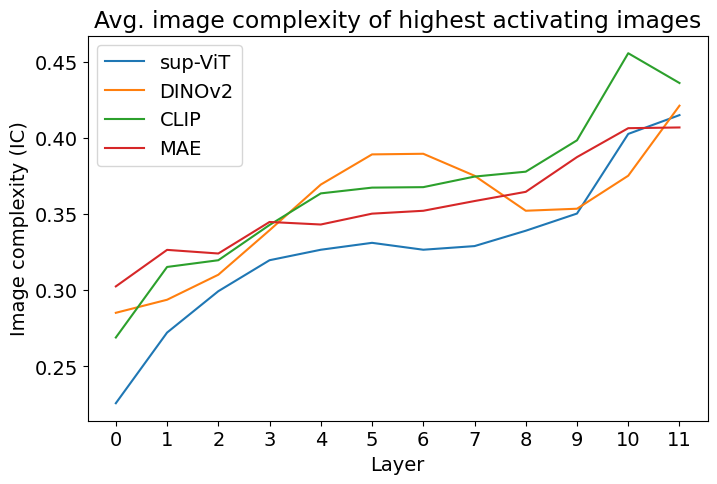

In [ ]:
# Figure 5

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(8, 5))
# load complexity scores
models = ["vit", "dinov2", "clip", "mae"]
comp = np.load("results/all.npy", allow_pickle=True)
for model in models:
    df = pd.read_csv(f"results/{model}.csv")
    comp_all = []
    for layer in df.layer.unique():
        comp_layer = []
        layer = df[df["layer"] == layer]
        for i, unit in enumerate(layer.index):
            images = layer.images[unit]
            # stupid rephrasing since it is saved as a string
            images = images[1:-1]
            images = images.split(" ")
            images = [x for x in images if x.strip()]
            for image in images:
                comp_layer.append(comp[int(image)])
        comp_layer = np.array(comp_layer)
        comp_all.append(np.mean(comp_layer))
    #print(f"{model}: {comp_all}")
    plt.plot(comp_all, label=model)
plt.xticks(ticks=range(len(results.layer.unique())), labels=range(len(results.layer.unique())))
   
plt.title(f"Avg. image complexity of highest activating images")
plt.ylabel(f"Image complexity (IC)")
plt.xlabel("Layer")
plt.legend(["sup-ViT", "DINOv2", "CLIP", "MAE"])
plt.show()